In [332]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
from matplotlib import pyplot as plt
from matplotlib import cm

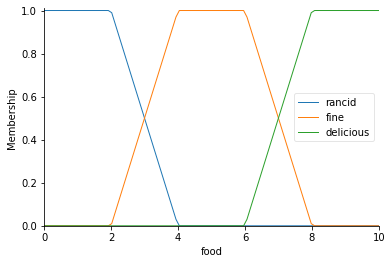

In [333]:
food = ctrl.Antecedent(np.linspace(0, 10, 100), 'food')
food['rancid'] = fuzz.trapmf(food.universe, [0, 0, 2, 4])
food['fine'] = fuzz.trapmf(food.universe, [2, 4, 6, 8])
food['delicious'] = fuzz.trapmf(food.universe, [6, 8, 10, 10])
food.view()

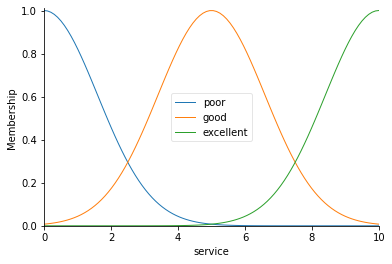

In [334]:
service = ctrl.Antecedent(np.linspace(0, 10, 100), 'service')
service['poor'] = fuzz.gaussmf(service.universe, 0, 1.6)
service['good'] = fuzz.gaussmf(service.universe, 5, 1.6)
service['excellent'] = fuzz.gaussmf(service.universe, 10, 1.6)
service.view()

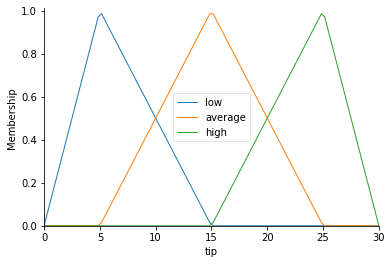

In [335]:
tip = ctrl.Consequent(np.linspace(0, 30, 100), 'tip')
tip['low'] = fuzz.trimf(tip.universe, [0, 5, 15])
tip['average'] = fuzz.trimf(tip.universe, [5, 15, 25])
tip['high'] = fuzz.trimf(tip.universe, [15, 25, 30])
tip.view()

In [336]:
rule1 = ctrl.Rule(food['rancid'] | service['poor'], tip['low'])
rule2 = ctrl.Rule(service['good'], tip['average'])
rule3 = ctrl.Rule(food['delicious'] | service['excellent'], tip['high'])

20.2%


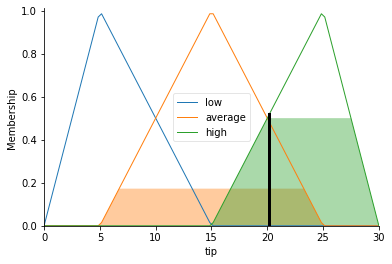

In [337]:
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

tipping.input['food'] = 7
tipping.input['service'] = 8

tipping.compute()
print(f"{np.around(tipping.output['tip'], 1)}%")
tip.view(sim=tipping)

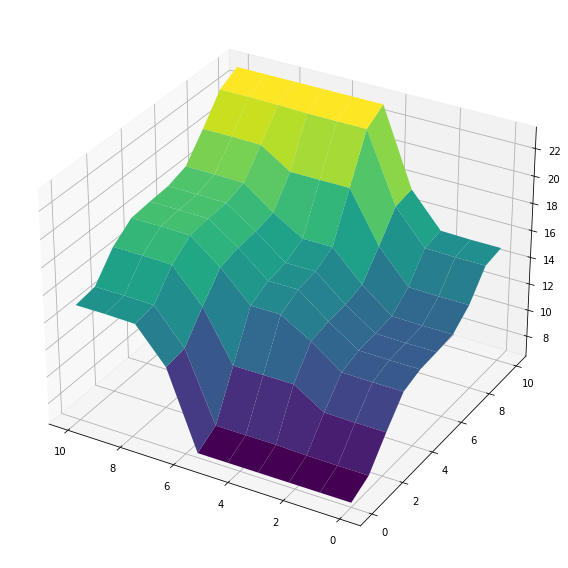

In [338]:
X = np.linspace(0, 10, 10)
Y = np.linspace(0, 10, 10)
def compute_surf(tipping, service, food):
    tipping.input['food'] = food
    tipping.input['service'] = service
    tipping.compute()
    return tipping.output['tip']

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

Z = np.array([compute_surf(tipping, x, y) for x in X for y in Y]).reshape(X.shape + Y.shape)
X, Y = np.meshgrid(X, Y)

ax.invert_xaxis()
surf = ax.plot_surface(X, Y, Z, cmap=cm.viridis, antialiased=True)
plt.tight_layout()
plt.show()